<a href="https://colab.research.google.com/github/sahapranta/colabs/blob/main/student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# model
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor

# metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# warnings
import warnings
warnings.filterwarnings('ignore')


In [7]:
df = pd.read_csv('bangladesh_student_performance.csv')
df.head()

,date,gender,age,address,famsize,Pstatus,M_Edu,F_Edu,M_Job,F_Job,relationship,smoker,tuition_fee,time_friends,ssc_result,hsc_result
0,29/04/2018,M,18,Rural,GT3,Together,3,2,At_home,Farmer,No,No,71672,4,4.22,3.72
1,29/04/2018,F,19,Rural,LE3,Apart,0,4,Other,Health,Yes,No,26085,5,3.47,2.62
2,29/04/2018,F,19,Rural,GT3,Together,0,3,Teacher,Services,No,No,40891,3,3.32,2.56
3,29/04/2018,F,19,Rural,LE3,Apart,2,3,At_home,Business,No,No,50600,2,4.57,4.17
4,29/04/2018,M,17,Rural,GT3,Together,1,1,At_home,Farmer,No,No,62458,2,4.50,3.94


In [3]:
!pip install ydata_profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.5 MB/s eta 0:00:00


In [5]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Bangladeshi Student Performance Report", explorative=True)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 16/16 [00:00<00:00, 31.69it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
df.columns

Index(['date', 'gender', 'age', 'address', 'famsize', 'Pstatus', 'M_Edu',
       'F_Edu', 'M_Job', 'F_Job', 'relationship', 'smoker', 'tuition_fee',
       'time_friends', 'ssc_result', 'hsc_result'],
      dtype='object')

In [9]:
df.columns = [
    'date', 'gender', 'age', 'address', 'family_size', 'pstatus', 'mother_education', 'father_education', 'mother_job',
    'father_job', 'relationship', 'is_smoker', 'tution_fee', 'time_with_friends', 'ssc_result', 'hsc_result'
]

In [10]:
if 'date' in df.columns:
    df.drop(columns=['date'], inplace=True)

co-relation for numeric values

In [12]:
corr_target = df.select_dtypes(include = np.number).corr()['hsc_result'].sort_values(ascending=False)
corr_target

,hsc_result
hsc_result,1.000000
ssc_result,0.950178
mother_education,0.063776
father_education,0.054811
tution_fee,0.038068
age,-0.009857
time_with_friends,-0.156356


Separate X and y

In [13]:
X = df.drop(columns=['hsc_result'], axis=1)
y = df['hsc_result']

X

,gender,age,address,family_size,pstatus,mother_education,father_education,mother_job,father_job,relationship,is_smoker,tution_fee,time_with_friends,ssc_result
0,M,18,Rural,GT3,Together,3,2,At_home,Farmer,No,No,71672,4,4.22
1,F,19,Rural,LE3,Apart,0,4,Other,Health,Yes,No,26085,5,3.47
2,F,19,Rural,GT3,Together,0,3,Teacher,Services,No,No,40891,3,3.32
3,F,19,Rural,LE3,Apart,2,3,At_home,Business,No,No,50600,2,4.57
4,M,17,Rural,GT3,Together,1,1,At_home,Farmer,No,No,62458,2,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,M,18,Urban,GT3,Together,2,2,Teacher,Health,No,No,108426,2,3.57
2014,M,19,Urban,GT3,Together,0,3,Other,Teacher,Yes,No,100665,5,4.05
2015,M,18,Urban,GT3,Together,3,2,Services,Farmer,Yes,No,92291,1,3.93
2016,M,19,Rural,GT3,Together,0,2,At_home,Teacher,No,No,43926,3,3.34


In [14]:
y

,hsc_result
0,3.72
1,2.62
2,2.56
3,4.17
4,3.94
...,...
2013,3.18
2014,3.13
2015,3.15
2016,2.83


In [21]:
numeric_features = X.select_dtypes(include = ['int64','float64']).columns
categorical_features = X.select_dtypes(include = ['object']).columns

# Pipeline

In [15]:
# for Numerical

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# for Categorical

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [22]:
# Combine preprocessors

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numeric_features),
    ('cat', cat_transformer, categorical_features)
])

In [16]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Ensemble - boosting, stacking

In [17]:
# base learner

lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [18]:
# Voting Regressor

voting_reg = VotingRegressor(
    estimators=[
        ('lr', lr),
        ('rf', rf),
        ('gb', gb)
    ]
)

In [19]:
# staking regressor

stacking_reg = StackingRegressor(
    estimators=[
        ('rf', rf),
        ('gb', gb)
    ],
    final_estimator=Ridge() #the meta learner
)

# Model Training

In [20]:
#dict of all models

models = {
    'Linear Regression': lr,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'Voting Regressor': voting_reg,
    'Stacking Regressor': stacking_reg
}

In [23]:
from sklearn import pipeline
# Training and evaluation

results = {}

for name, model in models.items():
    print(f"Training {name}...")

    # Create full pipeline with preprocessor
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # train
    pipe.fit(X_train, y_train)

    # predict
    y_pred = pipe.predict(X_test)

    # evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results[name] = {'MSE': mse, 'R2': r2, 'MAE': mae, 'RMSE': rmse}

result_df = pd.DataFrame(results).T
result_df

Training Linear Regression...
Training Random Forest...
Training Gradient Boosting...
Training Voting Regressor...
Training Stacking Regressor...


,MSE,R2,MAE,RMSE
Linear Regression,0.020269,0.945920,0.111376,0.142371
Random Forest,0.018647,0.950248,0.108201,0.136556
Gradient Boosting,0.015155,0.959565,0.098902,0.123107
Voting Regressor,0.015919,0.957528,0.100838,0.126169
Stacking Regressor,0.015155,0.959566,0.098696,0.123105


# Visualization

In [24]:
best_model_name = result_df['MSE'].idxmin()
best_model = models[best_model_name]
best_model

StackingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(random_state=42))],
                  final_estimator=Ridge())

In [25]:
# fit the best model
final_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', best_model)
])

final_pipe.fit(X_train, y_train)

y_final_pred = final_pipe.predict(X_test)

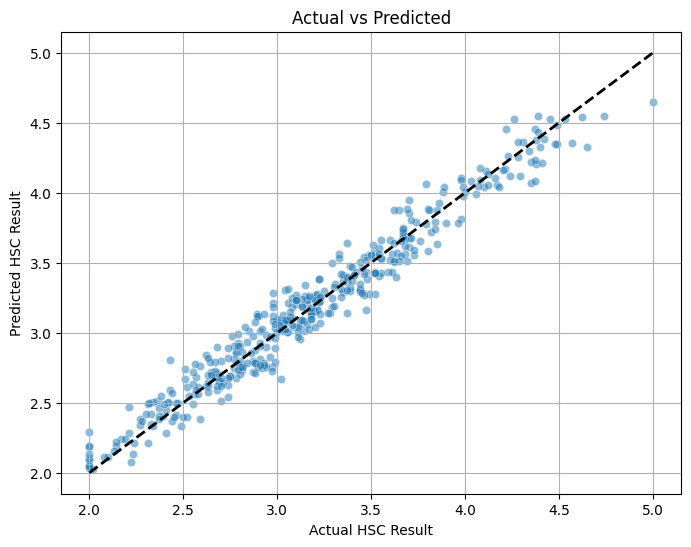

In [28]:
# plot Actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_final_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual HSC Result')
plt.ylabel('Predicted HSC Result')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()